https://learning.oreilly.com/library/view/python-programming-in/9781284175578/xhtml/16_Chapter11.xhtml#ch11

#### The rules

Our computer simulation models a world that contains two types of life-forms: bears and fish.  Each life-form is described by a set of rules that governs how it lives. Initially, a group of life-forms will be placed in the world at random locations.  Only one of two states is allowed for them = live, or suspended.  

When a fish is alive, it is allowed to breed, move, and die. Once a fish has been in the alive state 12 times, it may attempt to breed. To do so, it randomly picks an adjacent location. If that location is empty, a new fish appears. If the location is occupied, the fish must wait until the next time and try again.  

Fish also tries to move, to a random adjacent location. If that location is empty, the fish moves to this new location. If the location is occupied, the fish can't move.   If there're two or more other fish living adjacent to its own space, then the fish will die.

When a bear is alive, it is allowed to breed, move, eat, and die. Breeding takes place in much the same fashion as a fish. The only difference is that bears need to be in the alive state eight times before they can start breeding. Bears moves in exactly the same manner as fish.

Bears are not impacted by overcrowding, but they do need to eat. To eat, a bear must determine whether fish are living in an adjacent location. If so, then the bear randomly picks one of the fish and “eats” it. To consume the fish, the bear moves to the location currently occupied by the chosen fish. If there are no adjacent fish, the bear begins to starve. Any bear that has been in the alive state and starving 10 times in a row will die.

The *World* class has dimensions and maintains a list of all life-forms present in it.  It has a 2-dimensional grid to track them.  The grid is represented as a row-major list of lists.  Each entry in the grid (represented by a list of lists) might have a entry representing a life-form or None.  Shown below is a list of lists, that represents the world.  In the below grid representation, there's a fish at (5,0) , and bears (2, 4) and (11, 5)

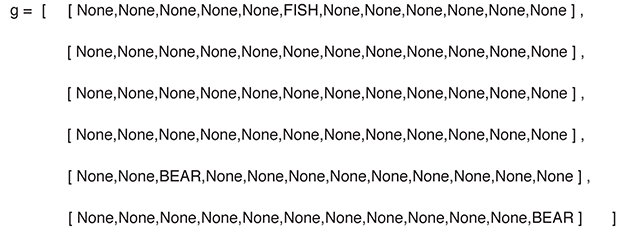

The **World** class

In [ ]:
# World class constructor
class World:
    def __init__(self, mX, mY):
        self.__maxX = mX
        self.__maxY = mY
        self.__thingList = []
        self.__grid = []
        
        for aRow in range(self.__maxY):
            row = []
            for aCol in range(self.__maxX):
                row.append(None)
            self.__grid.append(row)
            
        self.__wTurtle = turtle.Turtle()
        self.__wScreen = turtle.Screen()
        self.__wScreen.screensize(2000, 1500)
        self.__wScreen.setworldcoordinates(0, 0, self.__maxX - 1, self.__maxY - 1)
        self.__wScreen.addshape("../files/bear.gif")
        self.__wScreen.addshape("../files/fish.gif")
        self.__wTurtle.hideturtle()
    
    def draw(self):
        self.__wScreen.tracer(0)
        for i in range(2):
            self.__wTurtle.forward(self.__maxX - 1)
            self.__wTurtle.left(90)
            self.__wTurtle.forward(self.__maxY - 1)
            self.__wTurtle.left(90)
        
        # draws the grid
        for i in range(self.__maxY - 1):
            self.__wTurtle.forward(self.__maxX - 1)
            self.__wTurtle.backward(self.__maxX - 1)
            self.__wTurtle.left(90)
            self.__wTurtle.forward(1)
            self.__wTurtle.right(90)
            
        self.__wTurtle.forward(1)
        self.__wTurtle.right(90)
        for i in range(self.__maxX - 2):
            self.__wTurtle.forward(self.__maxY - 1)
            self.__wTurtle.backward(self.__maxY - 1)
            self.__wTurtle.left(90)
            self.__wTurtle.forward(1)
            self.__wTurtle.right(90)
        self.__wScreen.tracer(1)
    
    def addThing(self, aThing, x, y):
        aThing.setX(x)
        aThing.setY(y)
        self.__grid[y][x] = aThing  # add lifeform to grid
        aThing.setWorld(self)
        self.__thingList.append(aThing)  # add to list of lifeforms
        aThing.appear()
        
    def delThing(self, aThing):
        aThing.hide()
        self.__grid[aThing.getY()][aThing.getX()] = None
        self.__thingList.remove(aThing)
        
    def moveThing(self, oldX, oldY, newX, newY):
        self.__grid[newY][newX] = self.__grid[oldY][oldX]
        self.__grid[oldY][oldX] = None
        
    def getMaxX(self):
        return self.__maxX

    def getMaxY(self):
        return self.__maxY

    def liveALittle(self):
        if self.__thingList != []:
            aThing = random.randrange(len(self.__thingList))
            randomThing = self.__thingList[aThing]
            randomThing.liveALittle()
    
    def emptyLocation(self, x, y):
        return self.__grid[y][x] == None

    def lookAtLocation(self, x, y):
        return self.__grid[y][x]
    
    def freezeWorld(self):
        self.__wScreen.exitonclick()

The draw method (LISTING 11.2) will use _ _wTurtle to draw the grid system using the maximum x and y dimensions. It first draws the outer boundaries of the grid and then fills in the horizontal and vertical lines.

liveALittle method is defined in World, because it chooses a random thing from the grid.  It internally calls the liveALittle of the corresponding lifeform

The **Fish** class

In [ ]:
class Fish:
    def __init__(self):
        self.__turtle = turtle.Turtle()
        self.__turtle.up()
        self.__turtle.hideturtle()
        self.__turtle.shape("../files/fish.gif")
        
        self.__xPos = 0
        self.__yPos = 0
        self.__world = None
        
        self.__breedTick = 0  # to check if the breeding happens only after 12 attempts
        
    def setX(self, newX):
        self.__xPos = newX
        
    def setY(self, newY):
        self.__yPos = newY
        
    def getX(self):
        return self.__xPos
        
    def getY(self):
        return self.__yPos
    
    def setWorld(self, aWorld):
        self.__world = aWorld
        
    def appear(self):
        self.__turtle.goto(self.__xPos, self.__yPos)
        self.__turtle.showturtle()
        
    def hide(self):
        self.__turtle.hideturtle()
        
    def move(self, newX, newY):
        self.__world.moveThing(self.__xPos, self.__yPos, newX, newY)
        self.__xPos = newX
        self.__yPos = newY
        self.__turtle.goto(self.__xPos, self.__yPos)
        
    def liveALittle(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        adjFish = 0  # counts the adjacent Fish
        for offset in offsetList:
            newX = self.__xPos + offset[0]
            newY = self.__yPos + offset[1]
            if 0 <= newX < self.__world.getMaxX() and \
               0 <= newY < self.__world.getMaxY():
                if (not self.__world.emptyLocation(newX, newY)) and \
                 isinstance(self.__world.lookAtLocation(newX, newY), Fish):
                    adjFish += 1
        
        if adjFish >= 2:  # if 2 or more adjacent Fish, then die
            self.__world.delThing(self)
        else:
            self.__breedTick += 1
            if self.__breedTick >= 12:  # if alive 12 or more ticks, then breed
                self.tryToBreed()
                
            self.tryToMove()
    
    def tryToBreed(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        randomOffsetIndex = random.randrange(len(offsetList))
        randomOffset = offsetList[randomOffsetIndex]
        nextX = self.__xPos + randomOffset[0]
        nextY = self.__yPos + randomOffset[1]
        while not (0 <= nextX < self.__world.getMaxX() and \
               0 <= nextY < self.__world.getMaxY()):
            randomOffsetIndex = random.randrange(len(offsetList))
            randomOffset = offsetList[randomOffsetIndex]
            nextX = self.__xPos + randomOffset[0]
            nextY = self.__yPos + randomOffset[1]
        if self.__world.emptyLocation(nextX, nextY):
            childThing = Fish()
            self.__world.addThing(childThing, nextX, nextY)
            self.__breedTick = 0  # reset breedTick, if breeding has been successful
            
    def tryToMove(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        randomOffsetIndex = random.randrange(len(offsetList))
        randomOffset = offsetList[randomOffsetIndex]
        nextX = self.__xPos + randomOffset[0]
        nextY = self.__yPos + randomOffset[1]
        while not (0 <= nextX < self.__world.getMaxX() and \
               0 <= nextY < self.__world.getMaxY()):
            randomOffsetIndex = random.randrange(len(offsetList))
            randomOffset = offsetList[randomOffsetIndex]
            nextX = self.__xPos + randomOffset[0]
            nextY = self.__yPos + randomOffset[1]
        if self.__world.emptyLocation(nextX, nextY):
            self.move(nextX, nextY)

**liveALittle** method in the **Fish** class counts the number of fish in the adjacent locations, and if greater than 2 dies.  If less than 2, breeds and moves to another location at random.  Adjacent locations are identified using the following offset matrix of tuples.

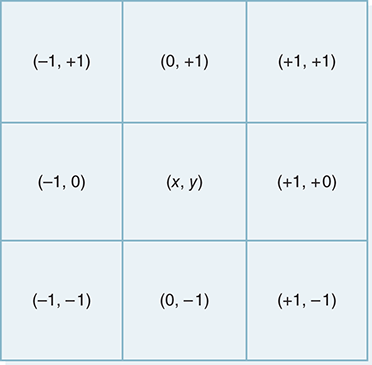

The **Bear** class

Bear class is similar to Fish class.  Except that Bear feeds on Fish.  If unable to find anything to eat for more than 10 ticks, it dies.  They don't die due to over-crowding.

In [ ]:
class Bear:
    def __init__(self):
        self.__turtle = turtle.Turtle()
        self.__turtle.up()
        self.__turtle.hideturtle()
        self.__turtle.shape("../files/bear.gif")
        
        self.__xPos = 0
        self.__yPos = 0
        self.__world = None
        
        self.__starveTick = 0  # to check if bear dies only after 10 starve ticks.
        self.__breedTick = 0  # to check if the breeding happens 8 ticks
        
    def setX(self, newX):
        self.__xPos = newX
        
    def setY(self, newY):
        self.__yPos = newY
        
    def getX(self):
        return self.__xPos
        
    def getY(self):
        return self.__yPos
    
    def setWorld(self, aWorld):
        self.__world = aWorld
        
    def appear(self):
        self.__turtle.goto(self.__xPos, self.__yPos)
        self.__turtle.showturtle()
        
    def hide(self):
        self.__turtle.hideturtle()
        
    def move(self, newX, newY):
        self.__world.moveThing(self.__xPos, self.__yPos, newX, newY)
        self.__xPos = newX
        self.__yPos = newY
        self.__turtle.goto(self.__xPos, self.__yPos)
        
    def liveALittle(self):
        self.__breedTick += 1
        if self.__breedTick >= 8:  # if alive 8 or more ticks, then breed
            self.tryToBreed()

        self.tryToEat()
    
        if self.__starveTick >= 10:  # if starving for 10 or more ticks, then die
            self.__world.delThing(self)
        else:
            self.tryToMove()
            
    def tryToBreed(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        randomOffsetIndex = random.randrange(len(offsetList))
        randomOffset = offsetList[randomOffsetIndex]
        nextX = self.__xPos + randomOffset[0]
        nextY = self.__yPos + randomOffset[1]
        while not (0 <= nextX < self.__world.getMaxX() and \
               0 <= nextY < self.__world.getMaxY()):
            randomOffsetIndex = random.randrange(len(offsetList))
            randomOffset = offsetList[randomOffsetIndex]
            nextX = self.__xPos + randomOffset[0]
            nextY = self.__yPos + randomOffset[1]
        if self.__world.emptyLocation(nextX, nextY):
            childThing = Bear()
            self.__world.addThing(childThing, nextX, nextY)
            self.__breedTick = 0  # reset breedTick, if breeding has been successful
            
    def tryToMove(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        randomOffsetIndex = random.randrange(len(offsetList))
        randomOffset = offsetList[randomOffsetIndex]
        nextX = self.__xPos + randomOffset[0]
        nextY = self.__yPos + randomOffset[1]
        while not (0 <= nextX < self.__world.getMaxX() and \
               0 <= nextY < self.__world.getMaxY()):
            randomOffsetIndex = random.randrange(len(offsetList))
            randomOffset = offsetList[randomOffsetIndex]
            nextX = self.__xPos + randomOffset[0]
            nextY = self.__yPos + randomOffset[1]
        if self.__world.emptyLocation(nextX, nextY):
            self.move(nextX, nextY)
            
    def tryToEat(self):
        offsetList = [(-1,1), (0,1), (1,1),
                      (-1,0),         (1,0),
                      (-1,-1), (0,-1), (1,-1)]
        adjPrey = []  # keeps a list of adjacent prey (Fish)
        for offset in offsetList:
            newX = self.__xPos + offset[0]
            newY = self.__yPos + offset[1]
            if 0 <= newX < self.__world.getMaxX() and \
               0 <= newY < self.__world.getMaxY():
                if (not self.__world.emptyLocation(newX, newY)) and \
                 isinstance(self.__world.lookAtLocation(newX, newY), Fish):
                    adjPrey.append(self.__world.lookAtLocation(newX, newY))
            
        if len(adjPrey) > 0:  # if any fish are adjacent, pick random Fish to eat
            randomPrey = adjPrey[random.randrange(len(adjPrey))]
            preyX = randomPrey.getX()
            preyY = randomPrey.getY()
            
            self.__world.delThing(randomPrey)  # delete the Fish
            self.move(preyX, preyY)  # move the Fish's location
            self.__starveTick = 0  # reset
        else:
            self.__starveTick += 1

In [ ]:
# import turtle
# w = World(50, 25)
# w.draw()
# w.freezeWorld()

In [ ]:
def mainSimulation():
    numberOfBears = 20
    numberOfFish = 20
    worldLifeTime = 2500
    worldWidth = 100
    worldHeight = 75
    
    myWorld = World(worldWidth, worldHeight)
    myWorld.draw()
    
    for i in range(numberOfFish):
        newFish = Fish()
        x = random.randrange(myWorld.getMaxX())
        y = random.randrange(myWorld.getMaxY())
        while not myWorld.emptyLocation(x,y):
            x = random.randrange(myWorld.getMaxX())
            y = random.randrange(myWorld.getMaxY())
        myWorld.addThing(newFish, x, y)
        
    for i in range(numberOfBears):
        newBear = Bear()
        x = random.randrange(myWorld.getMaxX())
        y = random.randrange(myWorld.getMaxY())
        while not myWorld.emptyLocation(x,y):
            x = random.randrange(myWorld.getMaxX())
            y = random.randrange(myWorld.getMaxY())
        myWorld.addThing(newBear, x, y)
    
    for i in range(worldLifeTime):
        myWorld.liveALittle()
        
    myWorld.freezeWorld()

In [ ]:
import turtle
import random
mainSimulation()